## Importing necessary libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU is available!")
    # Enable memory growth for the GPU
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
else:
    print("GPU is not available.")

GPU is available!


## Data Preprocessing

### Training Image Preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/lenovo/OneDrive/Desktop/Image detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels = 'inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)
    

Found 70295 files belonging to 38 classes.


##  validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/lenovo/OneDrive/Desktop/Image detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


## Build the Model

In [7]:
cnn = tf.keras.models.Sequential()

## Building the convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

In [10]:
cnn.add(layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.5)) ##to prevent overfittingcnn.add(tf.keras.layers.Dropout(0.5)) ##to prevent overfitting

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

## compiling the training phase

In [ ]:
optimizer = optimizers.RMSprop(learning_rate=0.0001)
cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

: 

In [1]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=30,
    callbacks=[early_stopping]
)

NameError: name 'EarlyStopping' is not defined

## Compiling model 

In [2]:
traininf_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

NameError: name 'cnn' is not defined

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)        0

## Model Evaluation

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)

: 

In [ ]:
print(train_loss, train_acc)

0.024776412174105644 0.992175817489624


## Model on Validation set

In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)

550/550 [==============================] - 12s 21ms/step - loss: 0.2602 - accuracy: 0.9524


In [ ]:
print(val_loss, val_acc)

0.2601892054080963 0.9524242877960205


## Saving the model

In [ ]:
cnn.save('C:/Users/lenovo/OneDrive/Desktop/Image detection/model.keras')

In [ ]:
traininf_history.history


{'loss': [0.11474935710430145,
  0.11066464334726334,
  0.1070174127817154,
  0.09941975772380829,
  0.0977778360247612,
  0.10005241632461548,
  0.10315504670143127,
  0.09442474693059921,
  0.09577975422143936,
  0.0928606241941452],
 'accuracy': [0.9672238230705261,
  0.9689024686813354,
  0.9691727757453918,
  0.9712639451026917,
  0.9725869297981262,
  0.972658097743988,
  0.9742228984832764,
  0.9752471446990967,
  0.9758588671684265,
  0.9764990210533142],
 'val_loss': [0.18994057178497314,
  0.31383076310157776,
  0.17946703732013702,
  0.1955992877483368,
  0.21479147672653198,
  0.2509844899177551,
  0.21316106617450714,
  0.2610700726509094,
  0.23969349265098572,
  0.2601895332336426],
 'val_accuracy': [0.9549852013587952,
  0.9336444139480591,
  0.9579444527626038,
  0.9577168226242065,
  0.9570339322090149,
  0.9487252235412598,
  0.9578875303268433,
  0.9521397948265076,
  0.9562941193580627,
  0.9524242877960205]}

## recording history in json format

In [ ]:
import json
with open('history.json', 'w') as f:
    json.dump(traininf_history.history, f)

## Accuracy Visualization

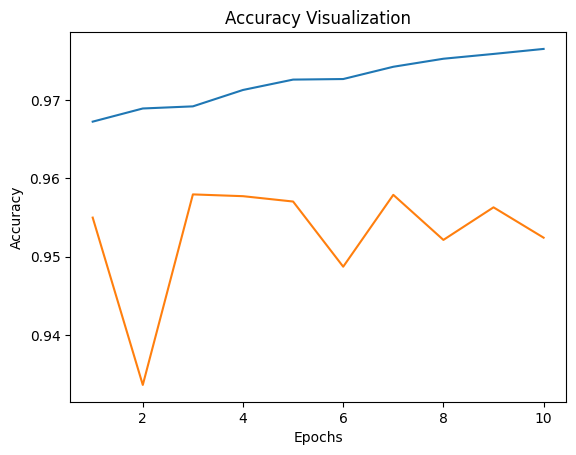

In [ ]:
epochs = [i for i in range(1 , 11)]
plt.plot(epochs, traininf_history.history['accuracy'], label='train_accuracy')
plt.plot(epochs, traininf_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Visualization')
plt.show()

## some matrices for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/lenovo/OneDrive/Desktop/Image detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
y_pred, y_pred.shape

550/550 [==============================] - 8s 14ms/step


(array([[1.00000000e+00, 1.75230029e-13, 9.82390133e-27, ...,
         2.75400765e-31, 0.00000000e+00, 2.51400230e-28],
        [1.00000000e+00, 1.26998325e-12, 2.18363266e-24, ...,
         3.28948095e-25, 5.83994691e-36, 4.86748036e-23],
        [1.00000000e+00, 1.77624355e-23, 2.49740054e-27, ...,
         0.00000000e+00, 0.00000000e+00, 3.98929117e-30],
        ...,
        [5.18083298e-13, 7.04456375e-18, 1.26752664e-10, ...,
         1.90088559e-14, 1.12678099e-14, 9.99987245e-01],
        [2.16650581e-14, 7.39625322e-21, 2.77059342e-16, ...,
         4.83849525e-21, 3.21326620e-26, 1.00000000e+00],
        [2.50608185e-22, 8.81064861e-29, 1.09881545e-26, ...,
         6.34967743e-30, 3.30085934e-16, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
y_true = tf.argmax(true_categories, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report(y_true, predicted_categories,target_names=class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.95      0.91      0.93       504\n                                 Apple___Black_rot       0.98      0.95      0.96       497\n                          Apple___Cedar_apple_rust       0.96      0.97      0.96       440\n                                   Apple___healthy       0.98      0.87      0.92       502\n                               Blueberry___healthy       0.95      0.98      0.96       454\n          Cherry_(including_sour)___Powdery_mildew       0.91      0.99      0.95       421\n                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.81      0.88       410\n                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.88      

In [ ]:
con_mat = confusion_matrix(y_true, predicted_categories)
con_mat.shape

(38, 38)

## Confusion Matrix Visualization

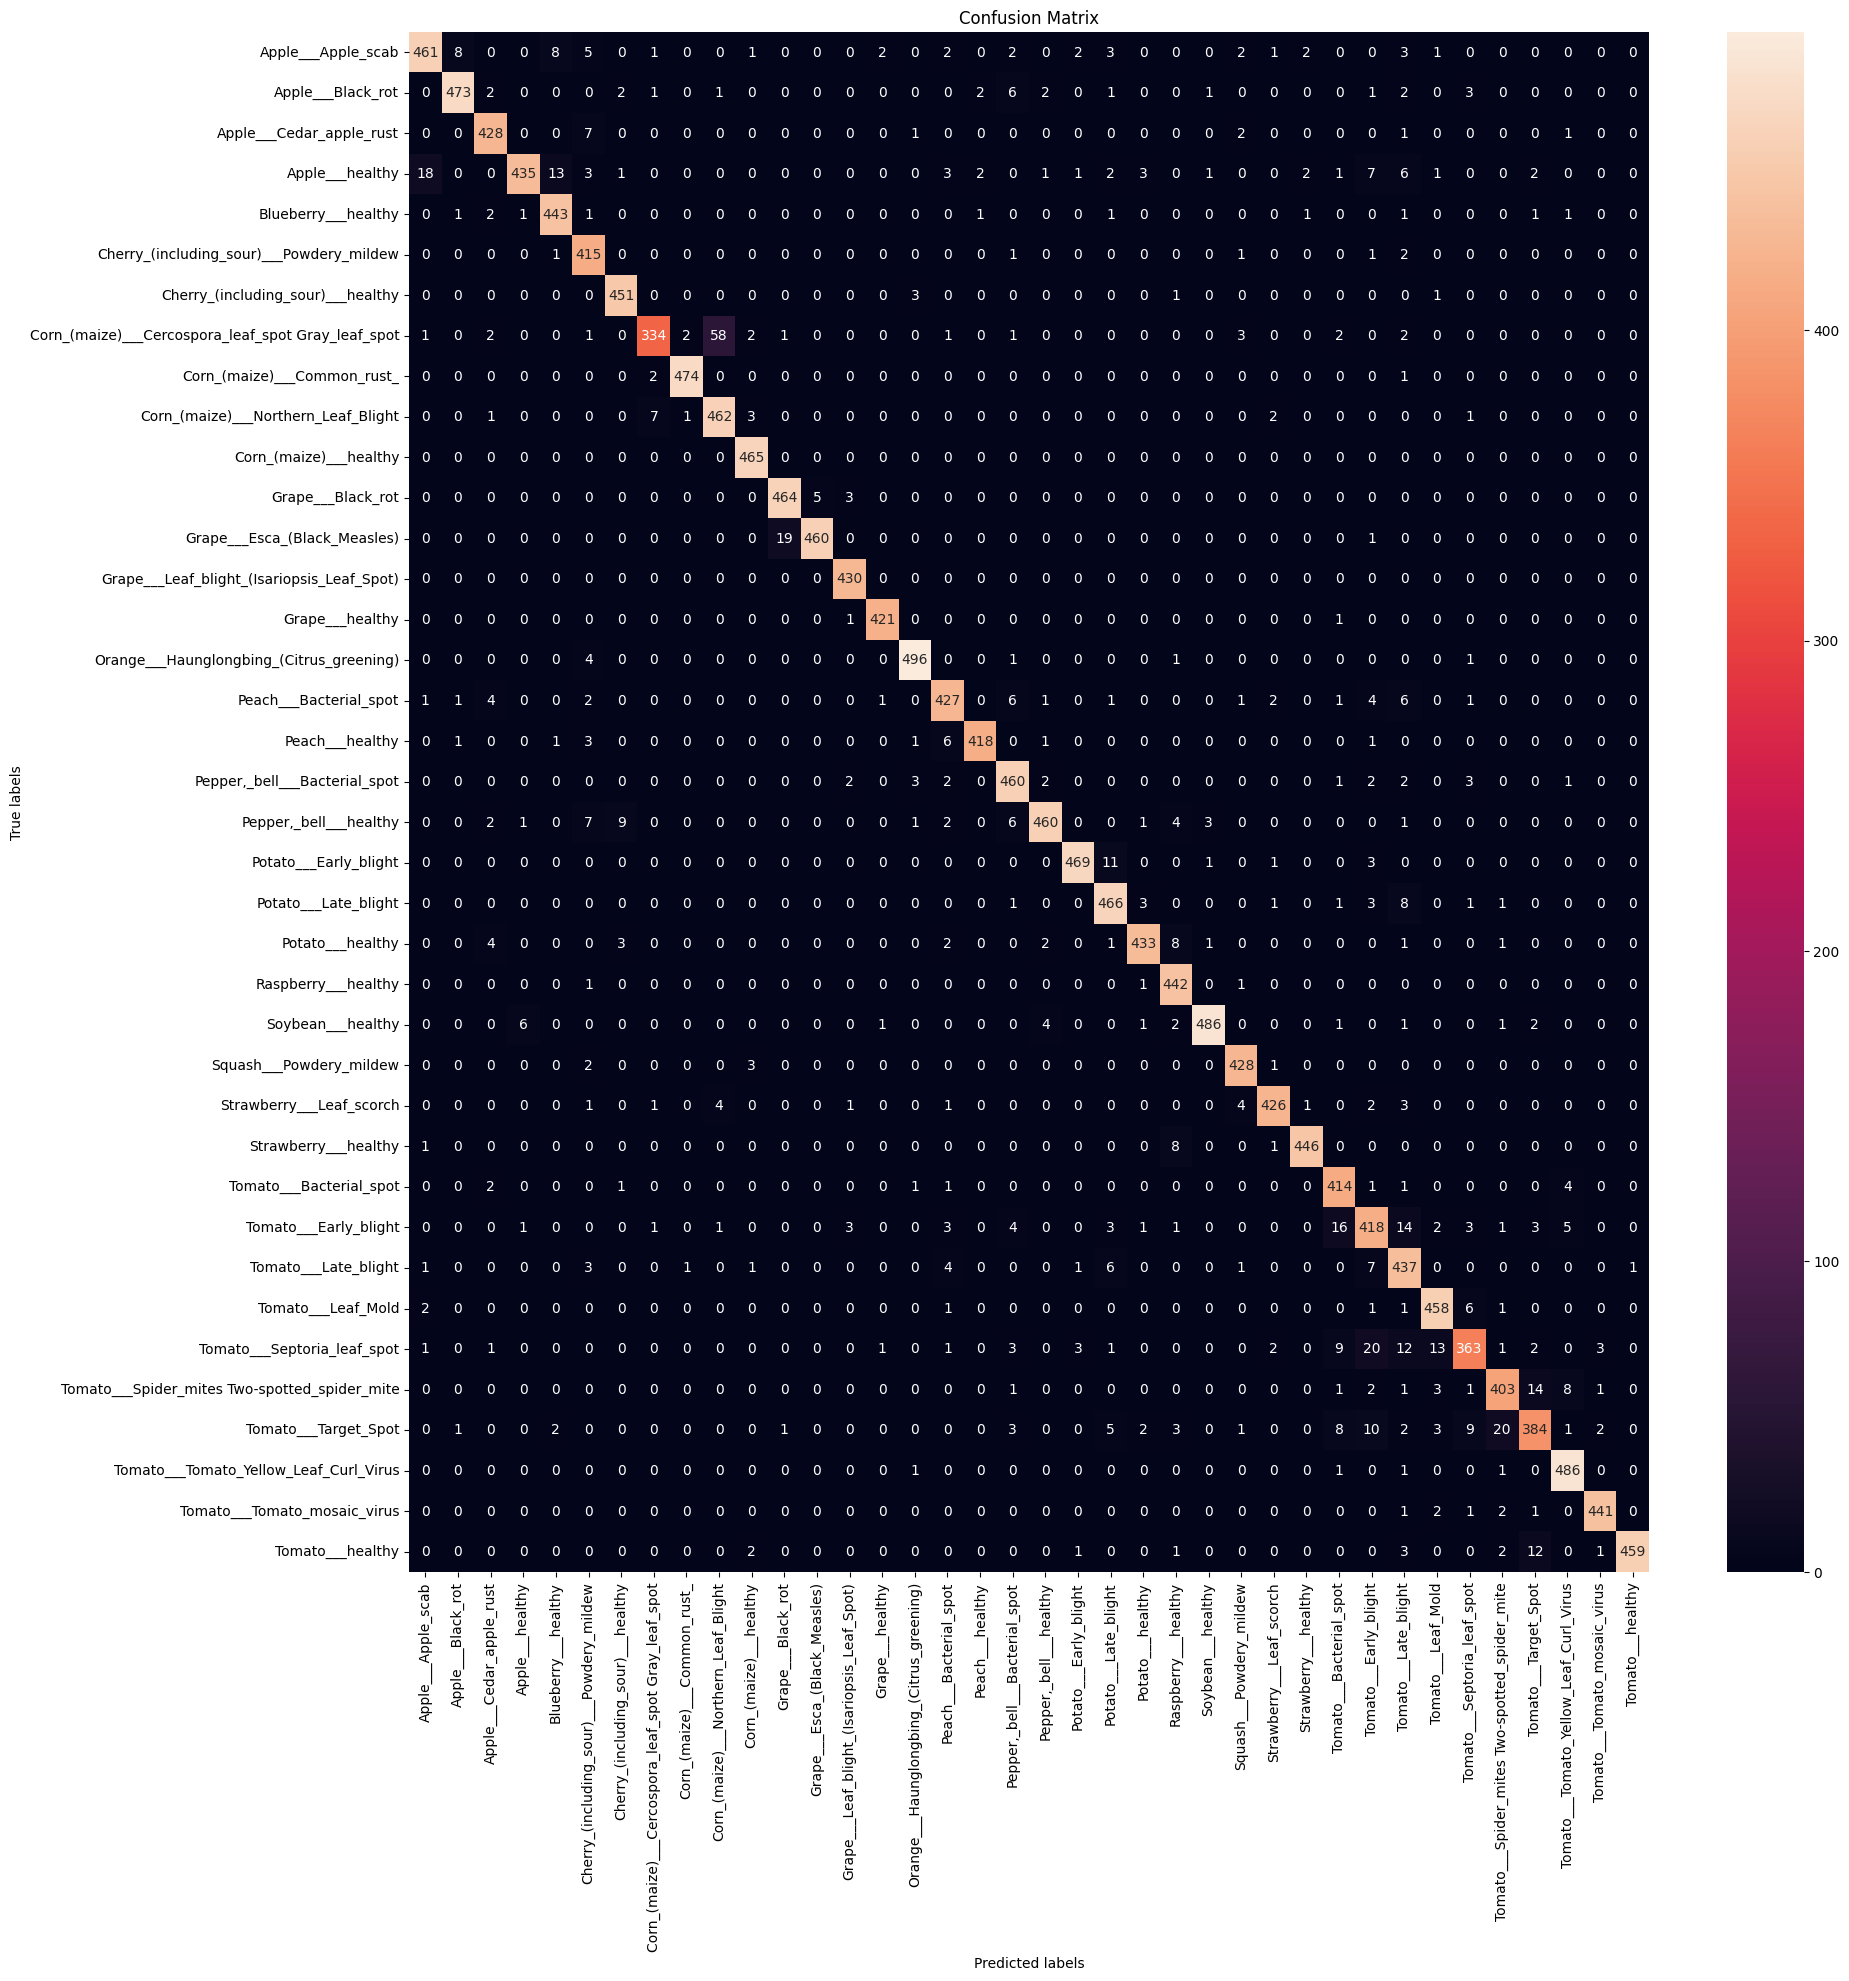

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(con_mat, annot=True, fmt='g', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()